# Intro to NN

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [146]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## Basic operations

![Simple Neuron](simple-neuron.png)

In [147]:
x1 = torch.tensor([0.1, 0.2], requires_grad=True)
x2 = torch.tensor([0.1, 0.1], requires_grad=True)
y = 3 * x1 + x2 + 1
output = y.mean()
output

tensor(1.5500)

In [148]:
output.backward()
print(x1.grad, x2.grad)
output.backward()
print(x1.grad, x2.grad)
output.backward()
print(x1.grad, x2.grad)

tensor([ 1.5000,  1.5000]) tensor([ 0.5000,  0.5000])
tensor([ 3.,  3.]) tensor([ 1.,  1.])
tensor([ 4.5000,  4.5000]) tensor([ 1.5000,  1.5000])


In [149]:
x1.grad.data.zero_()

tensor([ 0.,  0.])

In [150]:
output.backward()
print(x1.grad, x2.grad)

tensor([ 1.5000,  1.5000]) tensor([ 2.,  2.])


In [151]:
x1 = torch.tensor([0.1, 0.2], requires_grad=True)
x2 = torch.tensor([0.1, 0.1], requires_grad=True)
y = 3 * x1 + x2 + 1
z = y.mean()
z = F.sigmoid(y)
output = z.mean()
output

tensor(0.8239)

In [152]:
output.backward()
print(x1.grad)

tensor([ 0.2380,  0.1959])


In [153]:
x = torch.tensor([3], requires_grad=True)
y = x**2
z = 2*y

In [154]:
z.backward()

In [155]:
x.grad

tensor([ 12])

## Boston dataset

In [156]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [157]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [158]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

We take two columns:
* per capita crime rate by town
* % lower status of the population

In [159]:
X = boston.data[:, [0, 12]]
medval = boston.target

Text(0.5,0,"Median value of owner-occupied homes in $1000's")

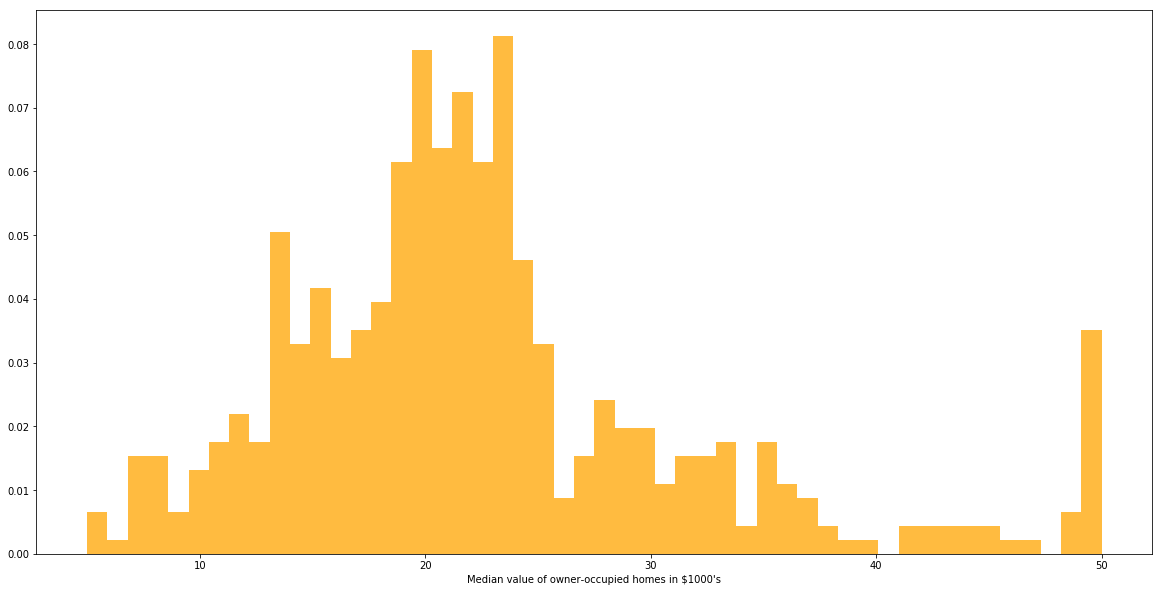

In [160]:
n, bins, patches = plt.hist(medval, 50, normed=1, facecolor='orange', alpha=0.75)
plt.xlabel("Median value of owner-occupied homes in $1000's")

Text(0,0.5,'per capita crime rate by town')

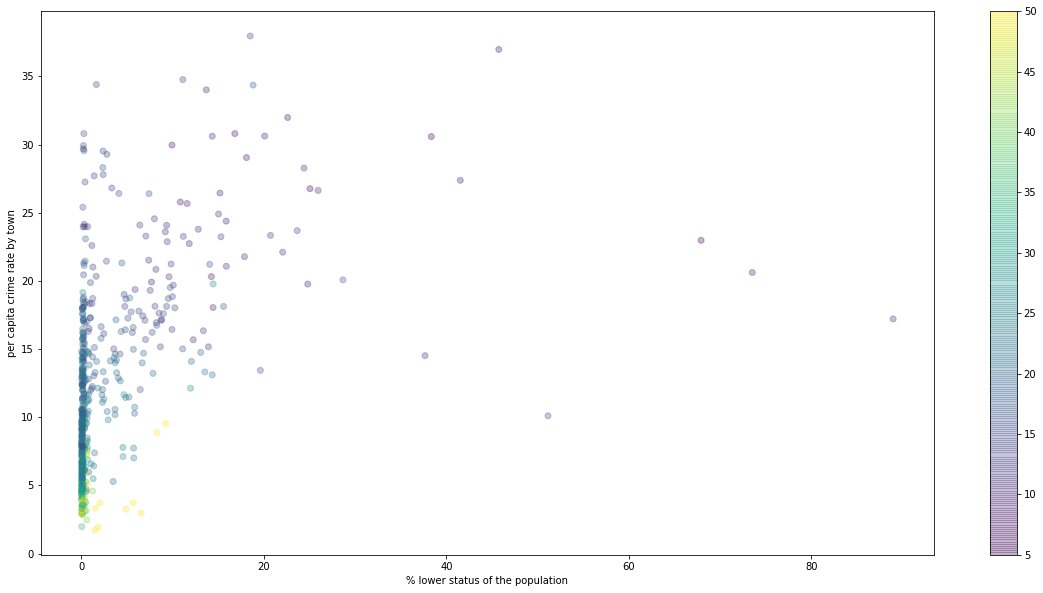

In [173]:
s = plt.scatter(X[:,0], X[:,1], c=medval, alpha=0.3)
plt.colorbar(s)
plt.xlabel("% lower status of the population")
plt.ylabel("per capita crime rate by town")
#plt.xlim(0, 2)

Text(0,0.5,"Median value of owner-occupied homes in $1000's")

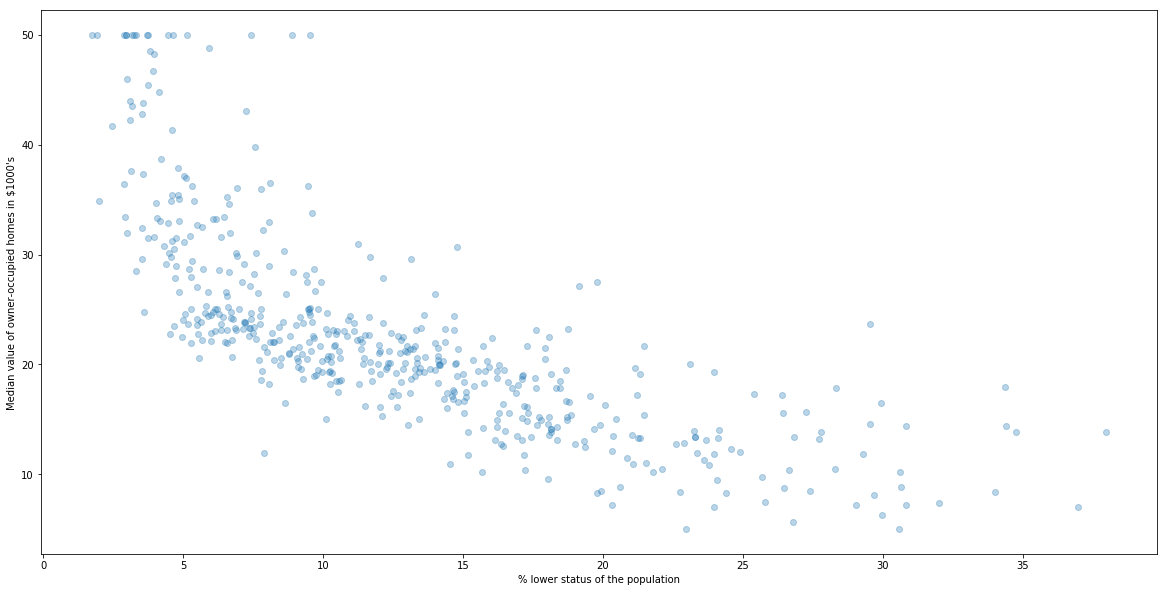

In [162]:
plt.scatter(X[:,1], medval, alpha=0.3)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")

## Regresion

In [163]:
# define target:
y = medval

In [164]:
# just to print it nicely
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['medval'] = y
df.head()

,CRIM,LSTAT,medval
0,0.00632,4.98,24.0
1,0.02731,9.14,21.6
2,0.02729,4.03,34.7
3,0.03237,2.94,33.4
4,0.06905,5.33,36.2


In [165]:
# translate numpy to torch's objects
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y).float()

In [186]:
# predefined linear model (no activation funcion)
model = nn.Linear(in_features=2, out_features=1, bias=True)

In [187]:
model.weight

Parameter containing:
tensor([[-0.1377,  0.2217]])

In [188]:
model.bias

Parameter containing:
tensor([ 0.2527])

In [189]:
### Choose loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## How to update weights

In [190]:
# Zero gradients (just in case)
optimizer.zero_grad()

# Forward pass, calculate predictions
output = model(X_torch)
output[:5, 0]

tensor([ 1.3561,  2.2756,  1.1425,  0.9001,  1.4250])

In [191]:
y_torch.unsqueeze(1)

tensor([[ 24.0000],
        [ 21.6000],
        [ 34.7000],
        [ 33.4000],
        [ 36.2000],
        [ 28.7000],
        [ 22.9000],
        [ 27.1000],
        [ 16.5000],
        [ 18.9000],
        [ 15.0000],
        [ 18.9000],
        [ 21.7000],
        [ 20.4000],
        [ 18.2000],
        [ 19.9000],
        [ 23.1000],
        [ 17.5000],
        [ 20.2000],
        [ 18.2000],
        [ 13.6000],
        [ 19.6000],
        [ 15.2000],
        [ 14.5000],
        [ 15.6000],
        [ 13.9000],
        [ 16.6000],
        [ 14.8000],
        [ 18.4000],
        [ 21.0000],
        [ 12.7000],
        [ 14.5000],
        [ 13.2000],
        [ 13.1000],
        [ 13.5000],
        [ 18.9000],
        [ 20.0000],
        [ 21.0000],
        [ 24.7000],
        [ 30.8000],
        [ 34.9000],
        [ 26.6000],
        [ 25.3000],
        [ 24.7000],
        [ 21.2000],
        [ 19.3000],
        [ 20.0000],
        [ 16.6000],
        [ 14.4000],
        [ 19.4000],


In [192]:
# Calculate loss
loss = criterion(output, y_torch.unsqueeze(1))

In [193]:
## Backward propagation
loss.backward()
model.weight.grad

tensor([[ -90.6620, -393.7025]])

In [194]:
## Upade weights
optimizer.step()
model.weight

Parameter containing:
tensor([[-0.1277,  0.2317]])

In [199]:
from torch.utils.data.dataset import Dataset

class BostonDataset(Dataset):
    
    def __init__(self):
        pass

## Logistic Regression

In [195]:
y = medval > 25 # if a 

In [196]:
# just for showing data
df = pd.DataFrame(X, columns=['CRIM', 'LSTAT'])
df['expensive'] = y
df.head()

,CRIM,LSTAT,expensive
0,0.00632,4.98,False
1,0.02731,9.14,False
2,0.02729,4.03,True
3,0.03237,2.94,True
4,0.06905,5.33,True


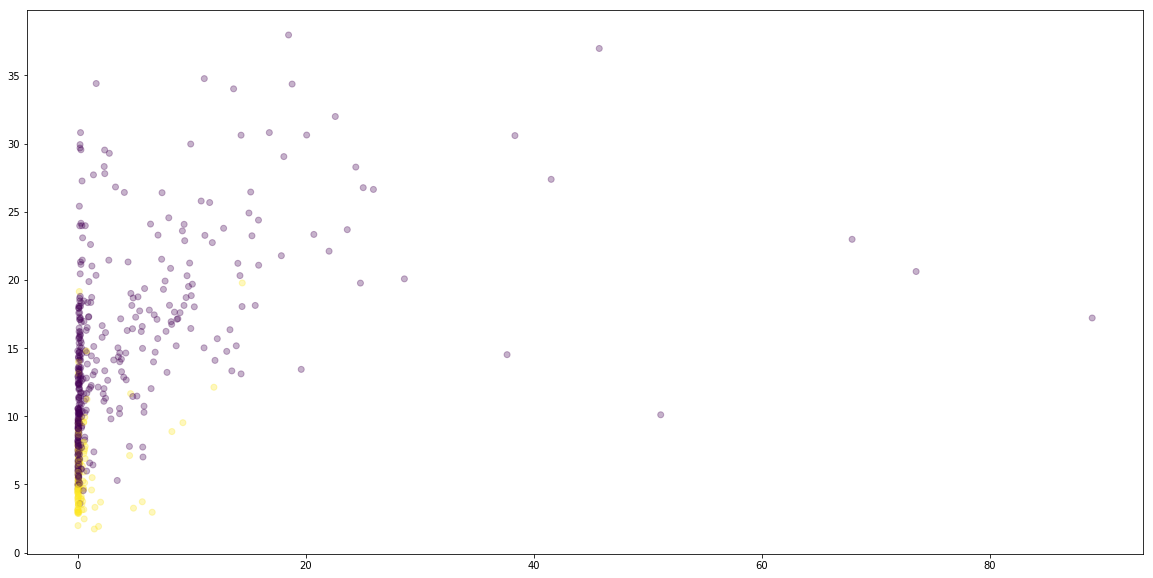

In [197]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
#plt.xlim(0, 2)

## Logistic regression: the simples NN

In [126]:
X_torch = torch.from_numpy(X).float()
y_torch = torch.tensor(y.astype(float)).float()

In [127]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc', nn.Linear(in_features=2, out_features=1, bias=True)),
                      ('sigmoid', nn.Sigmoid())]))

In [128]:
model.fc.weight

Parameter containing:
tensor([[ 0.5996,  0.0780]])

In [129]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [130]:
## zero gradients
optimizer.zero_grad()

In [131]:
## forward pass
output = model.forward(X_torch[:32, :])

In [132]:
## calculate loss
loss = criterion(output, y_torch[:32].unsqueeze(1))

In [133]:
## backward propagation
loss.backward()
model.fc.weight.grad

tensor([[  0.4921,  10.4827]])

In [135]:
## updating weights
optimizer.step()

In [136]:
model.fc.weight

Parameter containing:
tensor([[ 0.5012, -2.0185]])